In [1]:
import glob
import os
import pandas as pd
import numpy as np

files_path = '/Users/annadugoul/Documents/SCData/SC5118'
read_files = glob.glob(os.path.join(files_path, "*.dat"))

np_array_values = []
for files in read_files:
    DailyP5118_data = pd.read_fwf(files, header=0)
    np_array_values.append(DailyP5118_data)
    DailyP5118_data.columns = ['YYYY', 'MM', 'DD', 'Pinmm']
    print(files)

/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56198.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56167.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56173.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56371.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56172.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56199.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_57318.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_57324.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56038.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_57326.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56158.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_57508.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56164.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56399.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56373.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56

In [2]:
np_array_values

[       YYYY  MM  DD  Pinmm
 0      1951   1   1 -999.0
 1      1951   1   2 -999.0
 2      1951   1   3 -999.0
 3      1951   1   4 -999.0
 4      1951   1   5 -999.0
 ...     ...  ..  ..    ...
 24832  2018  12  27    3.7
 24833  2018  12  28    7.0
 24834  2018  12  29 -999.0
 24835  2018  12  30    0.0
 24836  2018  12  31    0.4
 
 [24837 rows x 4 columns],
        YYYY  MM  DD  Pinmm
 0      1951   1   1 -999.0
 1      1951   1   2 -999.0
 2      1951   1   3 -999.0
 3      1951   1   4 -999.0
 4      1951   1   5 -999.0
 ...     ...  ..  ..    ...
 24832  2018  12  27    0.0
 24833  2018  12  28    0.0
 24834  2018  12  29    0.0
 24835  2018  12  30    0.0
 24836  2018  12  31    0.0
 
 [24837 rows x 4 columns],
        YYYY  MM  DD  Pinmm
 0      1951   1   1 -999.0
 1      1951   1   2 -999.0
 2      1951   1   3 -999.0
 3      1951   1   4 -999.0
 4      1951   1   5 -999.0
 ...     ...  ..  ..    ...
 24832  2018  12  27    0.0
 24833  2018  12  28    0.0
 24834  2018  12  

In [3]:
merge_values = np.vstack(np_array_values)
DailyP5118_data = pd.DataFrame(merge_values,
                columns=('YYYY', 'MM', 'DD', 'Pinmm'))
DailyP5118_data

,YYYY,MM,DD,Pinmm
0,1951.0,1.0,1.0,-999.0
1,1951.0,1.0,2.0,-999.0
2,1951.0,1.0,3.0,-999.0
3,1951.0,1.0,4.0,-999.0
4,1951.0,1.0,5.0,-999.0
...,...,...,...,...
3874567,2018.0,12.0,27.0,0.2
3874568,2018.0,12.0,28.0,0.3
3874569,2018.0,12.0,29.0,1.9
3874570,2018.0,12.0,30.0,0.0


In [4]:
import pandas as pd
import os

path = r'/Users/annadugoul/Documents/SCData/SC5118'
files = os.listdir(path)

DailyP5118_data = pd.DataFrame()

for file in files:
    df_station = pd.read_fwf(path + '//' + file)
    df_station['Station'] = file
    DailyP5118_data = DailyP5118_data.append(df_station)
DailyP5118_data

,YYYY,MM,DD,Pinmm,Station
0,1951,1,1,-999.0,DailyP5118_56198.dat
1,1951,1,2,-999.0,DailyP5118_56198.dat
2,1951,1,3,-999.0,DailyP5118_56198.dat
3,1951,1,4,-999.0,DailyP5118_56198.dat
4,1951,1,5,-999.0,DailyP5118_56198.dat
...,...,...,...,...,...
24832,2018,12,27,0.2,DailyP5118_57328.dat
24833,2018,12,28,0.3,DailyP5118_57328.dat
24834,2018,12,29,1.9,DailyP5118_57328.dat
24835,2018,12,30,0.0,DailyP5118_57328.dat


In [5]:
DailyP5118_data['Date'] = DailyP5118_data['DD'].map(str) + '/' + DailyP5118_data['MM'].map(str) + '/' + DailyP5118_data['YYYY'].map(str)
DailyP5118_data = pd.DataFrame(DailyP5118_data)
DailyP5118_data

cols_to_check = ['Station']
DailyP5118_data[cols_to_check] = DailyP5118_data[cols_to_check].replace({'.dat':''}, regex=True)
DailyP5118_data[cols_to_check] = DailyP5118_data[cols_to_check].replace({'DailyP5118_':''}, regex=True)
DailyP5118_data = pd.DataFrame(DailyP5118_data)
DailyP5118_data

,YYYY,MM,DD,Pinmm,Station,Date
0,1951,1,1,-999.0,56198,1/1/1951
1,1951,1,2,-999.0,56198,2/1/1951
2,1951,1,3,-999.0,56198,3/1/1951
3,1951,1,4,-999.0,56198,4/1/1951
4,1951,1,5,-999.0,56198,5/1/1951
...,...,...,...,...,...,...
24832,2018,12,27,0.2,57328,27/12/2018
24833,2018,12,28,0.3,57328,28/12/2018
24834,2018,12,29,1.9,57328,29/12/2018
24835,2018,12,30,0.0,57328,30/12/2018


In [6]:
DailyP5118_data.replace(-999, np.nan, inplace=True)
DailyP5118_data.replace(-99.9, np.nan, inplace=True)
DailyP5118_data.replace(999, np.nan, inplace=True)

In [7]:
the_data = DailyP5118_data.drop(DailyP5118_data.index[0:17897])
the_data

,YYYY,MM,DD,Pinmm,Station,Date
17897,2000,1,1,0.0,56198,1/1/2000
17898,2000,1,2,0.0,56198,2/1/2000
17899,2000,1,3,0.0,56198,3/1/2000
17900,2000,1,4,0.0,56198,4/1/2000
17901,2000,1,5,0.0,56198,5/1/2000
...,...,...,...,...,...,...
24832,2018,12,27,0.2,57328,27/12/2018
24833,2018,12,28,0.3,57328,28/12/2018
24834,2018,12,29,1.9,57328,29/12/2018
24835,2018,12,30,0.0,57328,30/12/2018


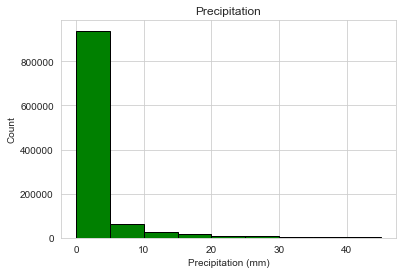

In [58]:
# 0 to 50
import pandas as pd
import matplotlib.pyplot as plt

# Create histogram
the_data['Pinmm'].hist(bins=range(0,50,5), color="green", edgecolor='black',grid=True)

plt.title("Precipitation")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Count")

#plot graph
plt.show()

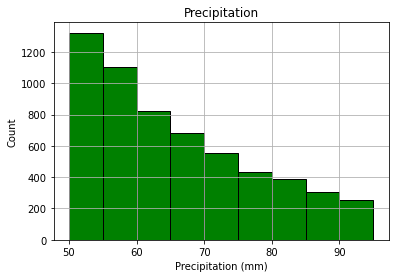

In [9]:
# 50 to 100
import pandas as pd
import matplotlib.pyplot as plt

# Create histogram
the_data['Pinmm'].hist(bins=range(50,100,5), color="green", edgecolor='black', grid=True)

plt.title("Precipitation")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Count")

#plot graph
plt.show()

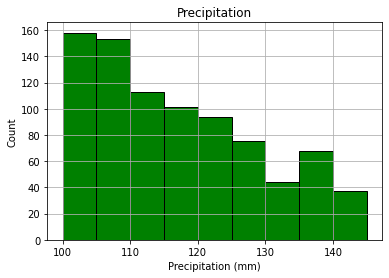

In [10]:
# 100 to 150
import pandas as pd
import matplotlib.pyplot as plt

# Create histogram
the_data['Pinmm'].hist(bins=range(100,150,5), color="green", edgecolor='black',grid=True)

plt.title("Precipitation")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Count")

#plot graph
plt.show()

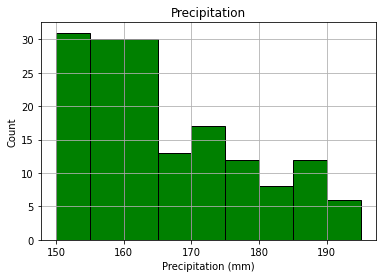

In [11]:
# 150 to 200
import pandas as pd
import matplotlib.pyplot as plt

# Create histogram
the_data['Pinmm'].hist(bins=range(150,200,5), color="green", edgecolor='black',grid=True)

plt.title("Precipitation")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Count")

#plot graph
plt.show()

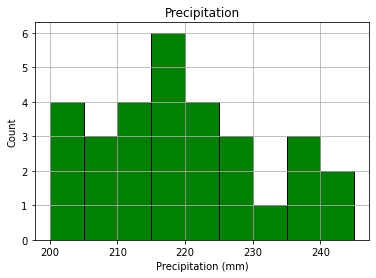

In [12]:
# 200 to 250
import pandas as pd
import matplotlib.pyplot as plt

# Create histogram
the_data['Pinmm'].hist(bins=range(200,250,5), color="green", edgecolor='black',grid=True)

plt.title("Precipitation")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Count")

#plot graph
plt.show()

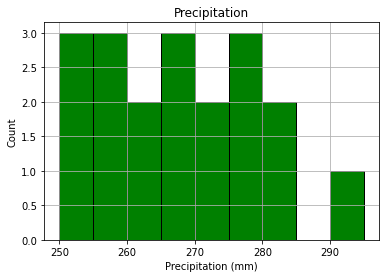

In [13]:
# 250 to 300
import pandas as pd
import matplotlib.pyplot as plt

# Create histogram
the_data['Pinmm'].hist(bins=range(250,300,5), color="green", edgecolor='black',grid=True)

plt.title("Precipitation")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Count")

#plot graph
plt.show()

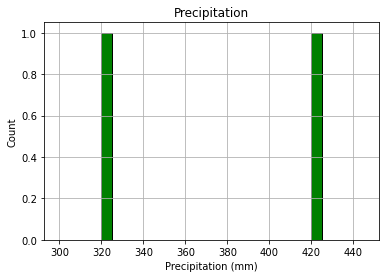

In [14]:
# 300 to 450
import pandas as pd
import matplotlib.pyplot as plt

# Create histogram
the_data['Pinmm'].hist(bins=range(300,450,5), color="green", edgecolor='black',grid=True)

plt.title("Precipitation")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Count")

#plot graph
plt.show()

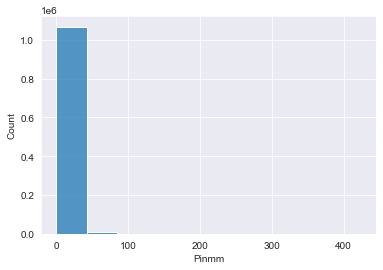

In [15]:
# seaborn
import seaborn as sns
sns.set_style('darkgrid')
sns.histplot(x ='Pinmm', data=the_data, bins=10);

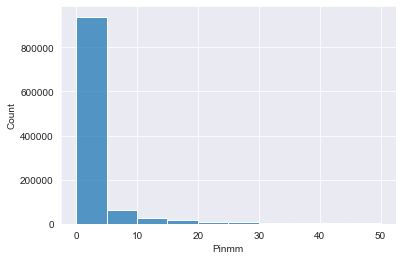

In [16]:
# seaborn 0 to 50
sns.histplot(x ='Pinmm', data=the_data,
             binwidth=5, binrange=(0,50));

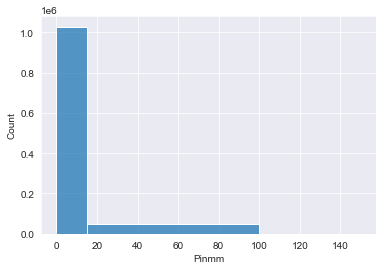

In [17]:
# seaborn irregular bins
sns.histplot(x ='Pinmm', data=the_data,
             bins=[0,15,100,150]);

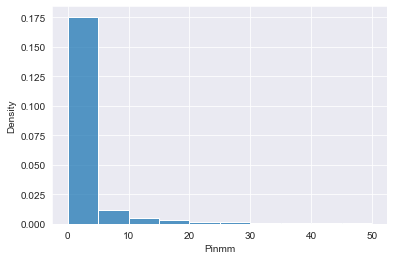

In [18]:
# seaborn density for PDF
sns.histplot(x ='Pinmm', data=the_data,
             stat='density', binwidth=5, binrange=(0,50)
            );

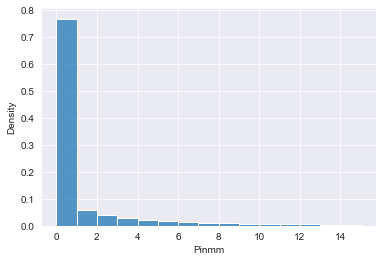

In [19]:
sns.histplot(x ='Pinmm', data=the_data,
             stat='density', binwidth=1, binrange=(0,15)
            );

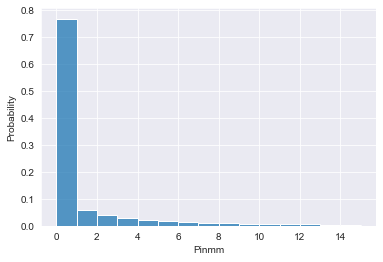

In [20]:
sns.histplot(x ='Pinmm', data=the_data,
             stat='probability', binwidth=1, binrange=(0,15)
            );

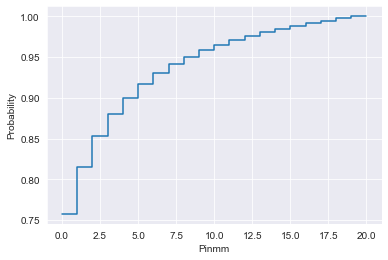

In [21]:
sns.histplot(x ='Pinmm', data=the_data,
             stat='probability', binwidth=1, binrange=(0,20), fill=False, element='step', cumulative=True
            );

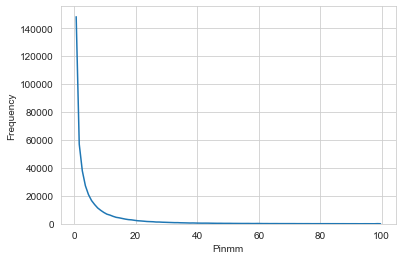

In [63]:
sns.histplot(x ='Pinmm', data=the_data,
             stat='frequency', binwidth=1, binrange=(0.1,100), fill=False, element='poly'
            );

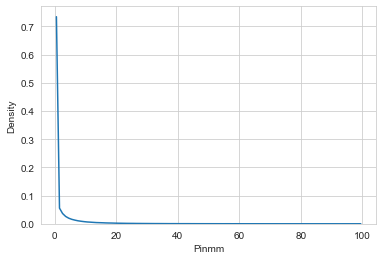

In [36]:
sns.histplot(x ='Pinmm', data=the_data,
             stat='density', binwidth=1, binrange=(0,100), fill=False, element='poly'
            );

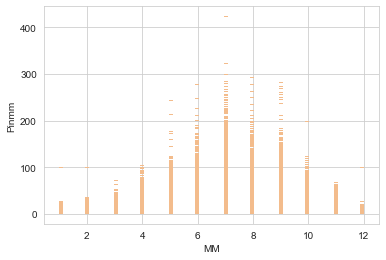

In [22]:
sns.set_style('whitegrid')
sns.histplot(x='MM', y='Pinmm', data=the_data, color='orange');

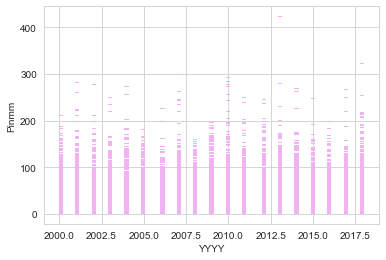

In [23]:
sns.set_style('whitegrid')
sns.histplot(x='YYYY', y='Pinmm', data=the_data, color='purple');